<IPython.core.display.Javascript object>


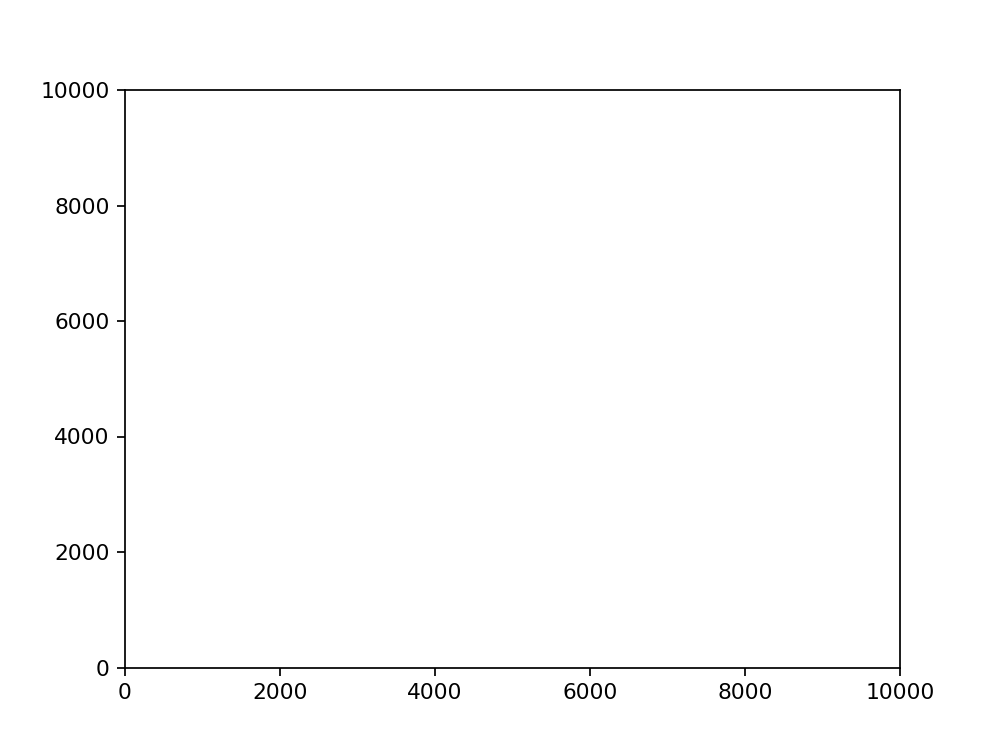

In [2]:
%matplotlib notebook
# %matplotlib inline

import os
import json
import subprocess
import multiprocessing
import time
# import keyboard
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.lines as line

from IPython.display import HTML


# 创建一个新的图形窗口
fig, ax = plt.subplots()

# 创建两个空的列表，用于存储x和y的值
xdata, ydata = [], []

# 创建一个空的线对象，用于动态更新
line, = ax.plot(xdata, ydata)

time_stamp = 0

# 初始化函数：绘图区域设置
def init():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    return line,


filepath='ma35_ju.json'
cmd="/opt/amd/ma35/bin/mautil examine -d 0000:09:00.0 --report electrical --format JSON -o " + filepath 

def get_data(frame):
 
        # 检查文件是否存在
        if os.path.exists(filepath):
            # 如果文件存在，删除它
            os.remove(filepath)

        # 调用ma35的工具读取板卡数据
        p0 = subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)
        output = p0.stdout.read()

        # 打开并读取文件
        with open('./' + filepath, 'r') as f:
            data = json.load(f)

        # 打印json数据
        # print(json.dumps(data, indent=4))
        # print(json.dumps(data['devices'][0]['electrical']['power']['board']['board_power']['power_mW'], indent=4))
        
        pwr=json.dumps(data['devices'][0]['electrical']['power']['board']['board_power']['power_mW'], indent=4)
        pwr=pwr[1:-1]
#         print(int(pwr))
#         print(frame)


        if len(xdata) > 1000:
            xdata.pop(0)
            ydata.pop(0)
        xdata.append(frame)
        ydata.append(int(pwr))
        print(xdata)
        print(ydata)
        line.set_data(xdata, ydata)
#         print(line.xdata)
        ax.set_xlim(0, frame + 1)  # 更新x轴的范围为0到当前帧数+1
        return line,

# 创建一个生成器，每秒生成一个时间戳
def timestamp_generator():
    global time_stamp
    while True:
        time_stamp=time_stamp+1
#         yield time.time()
        yield time_stamp

# 创建一个新的进程，目标函数是read_data
# p = multiprocessing.Process(target=get_data)

# 启动新的进程
# p.start()

# 创建动画对象
ani = FuncAnimation(fig, get_data, frames=timestamp_generator(), init_func=init, interval=1000000, blit=True, cache_frame_data=False)

plt.show()

# 在Jupyter Notebook中显示动画
# HTML(ani.to_jshtml())
